In [21]:
import numpy as np
import cv2

def evaluate_masks(pred, gt):
    pred_bin = pred > 0
    gt_bin = gt > 0

    epsilon = 1e-6
    
    intersection = np.logical_and(pred_bin, gt_bin).sum()
    union = np.logical_or(pred_bin, gt_bin).sum()

    TP = intersection
    # False Positives (FP) = Pixels in Prediction but not in Ground Truth
    FP = pred_bin.sum() - TP 
    # False Negatives (FN) = Pixels in Ground Truth but not in Prediction
    FN = gt_bin.sum() - TP
    
    dice = (2 * TP) / (pred_bin.sum() + gt_bin.sum() + epsilon)
    iou = TP / (union + epsilon)
    precision = TP / (TP + FP + epsilon)
    recall = TP / (TP + FN + epsilon)
    
    return iou, dice, precision, recall

for i in range(10):
    bgr_path = f'simple_bgr_results/{i}.png'
    aco_path = f'aco_results/{i}.png'
    mask_path = f'dataset/masks/{i}.png'

    mask_aco = cv2.imread(aco_path, cv2.IMREAD_GRAYSCALE)
    mask_simple_bgr = cv2.imread(bgr_path, cv2.IMREAD_GRAYSCALE)
    mask_gt = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    iou_aco, dice_aco ,precision_aco, recall_aco = evaluate_masks(mask_aco, mask_gt)
    iou_ws, dice_ws, precision_ws, recall_ws = evaluate_masks(mask_simple_bgr, mask_gt)
    
    print(f"ACO        {i}.jpg IoU: {iou_aco:.3f}, Dice: {dice_aco:.3f}, Precision: {precision_aco:.3f}, Recall: {recall_aco:.3f}")
    print(f"Simple BGR {i}.jpg IoU: {iou_ws:.3f}, Dice: {dice_ws:.3f}, Precision: {precision_ws:.3f}, Recall: {recall_ws:.3f}")

ACO        0.jpg IoU: 0.736, Dice: 0.848, Precision: 0.744, Recall: 0.986
Simple BGR 0.jpg IoU: 0.725, Dice: 0.840, Precision: 0.732, Recall: 0.987
ACO        1.jpg IoU: 0.723, Dice: 0.840, Precision: 0.993, Recall: 0.727
Simple BGR 1.jpg IoU: 0.656, Dice: 0.792, Precision: 0.685, Recall: 0.939
ACO        2.jpg IoU: 0.851, Dice: 0.920, Precision: 0.967, Recall: 0.876
Simple BGR 2.jpg IoU: 0.861, Dice: 0.926, Precision: 0.915, Recall: 0.936
ACO        3.jpg IoU: 0.938, Dice: 0.968, Precision: 0.972, Recall: 0.965
Simple BGR 3.jpg IoU: 0.931, Dice: 0.964, Precision: 0.951, Recall: 0.978
ACO        4.jpg IoU: 0.932, Dice: 0.965, Precision: 0.997, Recall: 0.934
Simple BGR 4.jpg IoU: 0.797, Dice: 0.887, Precision: 0.803, Recall: 0.991
ACO        5.jpg IoU: 0.954, Dice: 0.977, Precision: 0.955, Recall: 0.999
Simple BGR 5.jpg IoU: 0.941, Dice: 0.970, Precision: 0.941, Recall: 1.000
ACO        6.jpg IoU: 0.885, Dice: 0.939, Precision: 0.979, Recall: 0.902
Simple BGR 6.jpg IoU: 0.895, Dice: 0.9

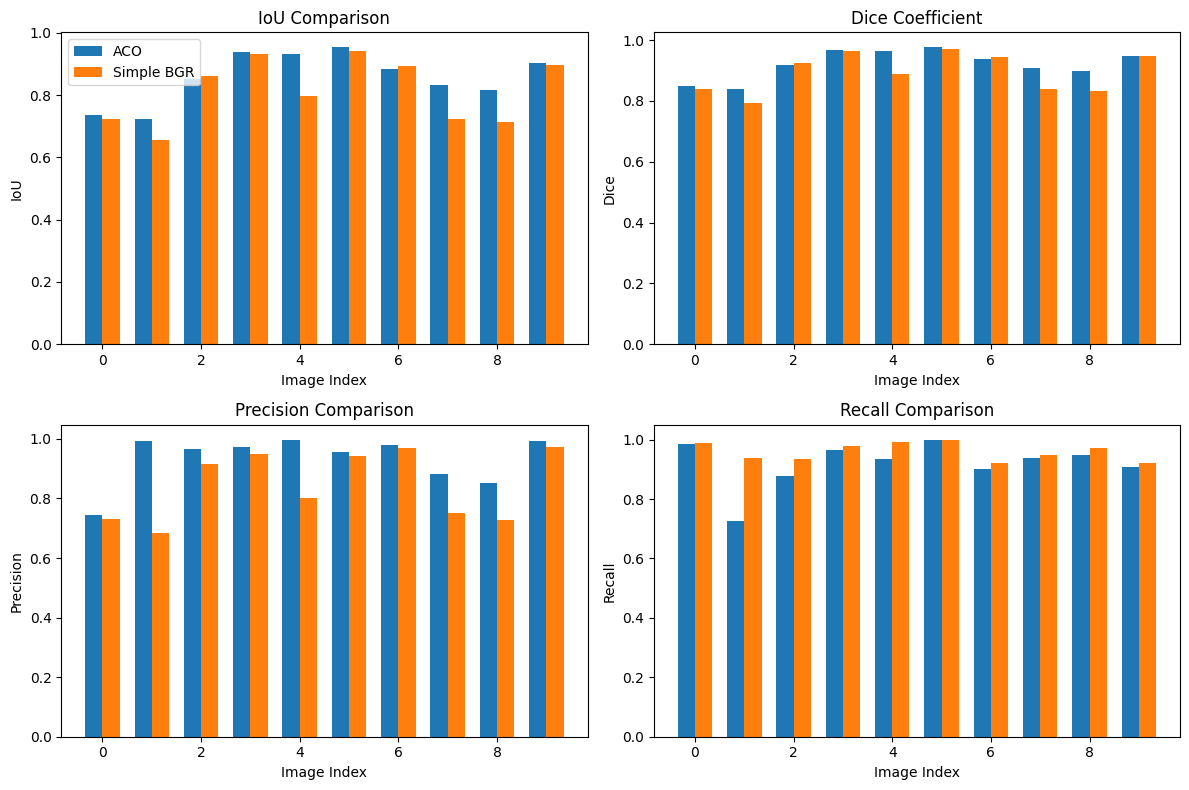

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

iou_aco_list, dice_aco_list, prec_aco_list, rec_aco_list = [], [], [], []
iou_ws_list, dice_ws_list, prec_ws_list, rec_ws_list = [], [], [], []

for i in range(10):
    bgr_path = f'simple_bgr_results/{i}.png'
    aco_path = f'aco_results/{i}.png'
    mask_path = f'dataset/masks/{i}.png'

    mask_aco = cv2.imread(aco_path, cv2.IMREAD_GRAYSCALE)
    mask_simple_bgr = cv2.imread(bgr_path, cv2.IMREAD_GRAYSCALE)
    mask_gt = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    iou_aco, dice_aco, precision_aco, recall_aco = evaluate_masks(mask_aco, mask_gt)
    iou_ws, dice_ws, precision_ws, recall_ws = evaluate_masks(mask_simple_bgr, mask_gt)

    iou_aco_list.append(iou_aco)
    dice_aco_list.append(dice_aco)
    prec_aco_list.append(precision_aco)
    rec_aco_list.append(recall_aco)

    iou_ws_list.append(iou_ws)
    dice_ws_list.append(dice_ws)
    prec_ws_list.append(precision_ws)
    rec_ws_list.append(recall_ws)

#Vizuelizacija
indices = np.arange(10)
bar_width = 0.35

plt.figure(figsize=(12, 8))

#IoU comparison
plt.subplot(2, 2, 1)
plt.bar(indices - bar_width/2, iou_aco_list, bar_width, label='ACO')
plt.bar(indices + bar_width/2, iou_ws_list, bar_width, label='Simple BGR')
plt.title('IoU Comparison')
plt.xlabel('Image Index')
plt.ylabel('IoU')
plt.legend()

# Dice
plt.subplot(2, 2, 2)
plt.bar(indices - bar_width/2, dice_aco_list, bar_width, label='ACO')
plt.bar(indices + bar_width/2, dice_ws_list, bar_width, label='Simple BGR')
plt.title('Dice Coefficient')
plt.xlabel('Image Index')
plt.ylabel('Dice')

# Precision
plt.subplot(2, 2, 3)
plt.bar(indices - bar_width/2, prec_aco_list, bar_width, label='ACO')
plt.bar(indices + bar_width/2, prec_ws_list, bar_width, label='Simple BGR')
plt.title('Precision Comparison')
plt.xlabel('Image Index')
plt.ylabel('Precision')

# Recall
plt.subplot(2, 2, 4)
plt.bar(indices - bar_width/2, rec_aco_list, bar_width, label='ACO')
plt.bar(indices + bar_width/2, rec_ws_list, bar_width, label='Simple BGR')
plt.title('Recall Comparison')
plt.xlabel('Image Index')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

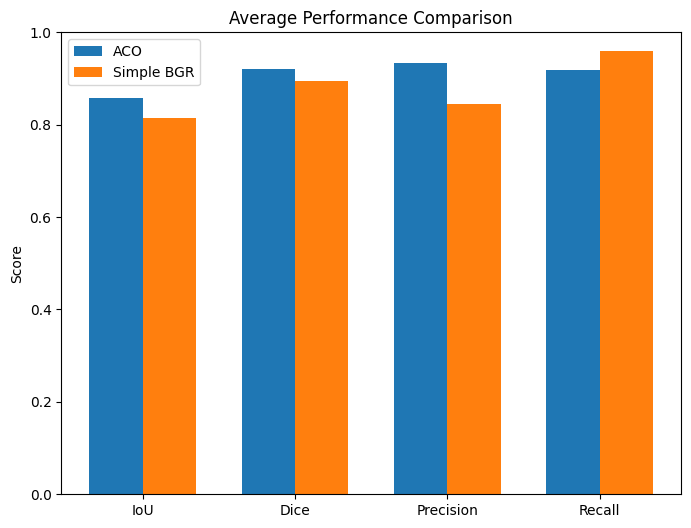

In [36]:
# Compute mean metrics
aco_means = [
    np.mean(iou_aco_list),
    np.mean(dice_aco_list),
    np.mean(prec_aco_list),
    np.mean(rec_aco_list)
]

ws_means = [
    np.mean(iou_ws_list),
    np.mean(dice_ws_list),
    np.mean(prec_ws_list),
    np.mean(rec_ws_list)
]

metrics = ['IoU', 'Dice', 'Precision', 'Recall']
x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - bar_width/2, aco_means, bar_width, label='ACO')
plt.bar(x + bar_width/2, ws_means, bar_width, label='Simple BGR')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Average Performance Comparison')
plt.legend()
plt.ylim(0,1)
#plt.savefig('comparison.png')
plt.show()